In [1]:
%matplotlib inline

import astropy.units as u
import numpy as np

from sunpy.coordinates import frames
from sunpy.sun import constants
import sunpy.map

def helio_plot(sat0, sat1):
    '''
    Creates a polar plot with the sun in the center and the position of two planets of satelites
    
    sat0, sat1: SkyCoords
    '''  
    ax = plt.subplot(111, projection='polar')
    ax.plot([sat0.lon.to(u.rad).value], [sat0.radius.value], 'o')
    ax.plot([sat1.lon.to(u.rad).value], [sat1.radius.value], 'o')
    ax.plot([0], [1], 'o', c='blue')
    ax.plot([0], [0], '*', c='yellow')
    ax.set_theta_zero_location("S")

    plt.show()
    
    
def sun_seen_from(position, name):
    
    # Find out the size of the sun
    solar_r = (constants.radius / position.radius).to(u.arcsec, equivalencies=u.dimensionless_angles())
    th = np.linspace(0 * u.deg, 360 * u.deg)

    # Create a FD map from there
    half_image = 100
    datax, datay = np.mgrid[-half_image:half_image, -half_image:half_image]
    data = 1 - np.sqrt(datax**2 + datay**2)
    coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=position.obstime, observer=position, frame=frames.Helioprojective)
    size = solar_r / half_image / u.pixel
    header = sunpy.map.header_helper.make_fitswcs_header(data, coord,
                                                         reference_pixel=u.Quantity([half_image, half_image]*u.pixel),
                                                         scale=u.Quantity([size, size]),
                                                         instrument='sunlike', detector=f'Sun seen from {name}')

    return sunpy.map.Map(data, header)


def get_corners(center, fov, closed=True):
    '''
    Returns the corners of a square observation.
    '''
    half_width = fov['width']/2
    half_height = fov['height']/2
    square = [[center['x'] - half_width, center['y'] - half_height],
              [center['x'] + half_width, center['y'] - half_height],
              [center['x'] + half_width, center['y'] + half_height],
              [center['x'] - half_width, center['y'] + half_height]]
    
    if closed:
        square += [square[0]]
    
    return square

import matplotlib.pyplot as plt
import astropy.units as u

def plot_orbit(traj):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.plot(traj.x.to(u.au), traj.y.to(u.au), lw=1)
    ax.scatter(0, 0, color='C1')
    ax.set_xlim(-1.1, 1.1); ax.set_ylim(-1.1, 1.1);
    return fig, ax

<center><h1>SolO Python</h1></center>

<br>
<center>
    <font size="56px"><b>How</b></font>
<table>
    <col width="230" align="left">
    <col width="130" align="center">
    <col width="230" align="right">
    <tr>
      <td style="vertical-align:bottom;"><img style="height: 70px;" src="media/sunpy_transparent.png"></td>
      <td style='text-align:center;'><font size="56px"><b>  and  </b></font></td>
      <td style='text-align:right;'><img style="height: 70px;" src="media/heliopy.png"></td>
    </tr>
</table>
<font size="56px"><b>can help your data analysis</b></font>
    </center>
    
    
<br>

<center>
    
#### David Pérez-Suárez & David Stansby

</center>

<center>
    <img style="height:500px;" src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg" class="center">
</center>
    

## Let's start talking about Python.

*Who uses python already? Who has heard what's python?*

- Python is a Free Open Source Programming Language => available by default in most of your computers.
- It's normally referred as batteries included => It comes with a [standard library](https://docs.python.org/3/library/) that allows you to do many things (read many file formats, work with dates, work with paths for different OSs,...)
- PEPs - Python Enhancement Proposals - mechanisms to provide new ideas for the core language.

<center>
   <h1>Scientific (and astronomical) ecosystem</h1>
    
   <img style="height:600px;" src="./media/scipy-stack.png" class="center">
</center>


Packages with large community behind. Most of them installed by the default [anaconda](https://www.anaconda.com/distribution/).

<center>
   <h1>but there's more!</h1>
    
   <img style="height:600px;" src="media/OA-stack.png" class="center">
</center>

[Astropy's affiliated](https://www.astropy.org/affiliated/index.html) (42), [SunPy's](https://sunpy.org/team.html#affiliated-packages) 

[OpenAstronomy](https://openastronomy.org/) was created to unified the efforts for GSOC. However, now it's more than that. We also provide support to outreach and educational efforts.

All these packages are not just *open source* but *open developed*. That means that they are developed in the open, using good practice and keeping everyone informed.

Why many packages? is a way to keep maintainance and test maturity.

<center>
    <img src="media/sunpy_transparent.png">
</center>

<center>
    <h1>Version 1.0</h1>
</center>

## Download data

In [2]:
import astropy.units as u
from sunpy.net import Fido, attrs as a

attrs_time = a.Time('2019/03/14 00:10', '2019/03/14 00:11:30')
result = Fido.search(attrs_time, a.Instrument('aia'), a.Wavelength(193*u.AA))

result

Start Time [1],End Time [1],Source,Instrument,Type,Wavelength [2]
,,,,,Angstrom
str19,str19,str3,str3,str8,float64
2019-03-14 00:10:04,2019-03-14 00:10:05,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:10:16,2019-03-14 00:10:17,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:10:28,2019-03-14 00:10:29,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:10:40,2019-03-14 00:10:41,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:10:52,2019-03-14 00:10:53,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:11:04,2019-03-14 00:11:05,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:11:16,2019-03-14 00:11:17,SDO,AIA,FULLDISK,193.0 .. 193.0
2019-03-14 00:11:28,2019-03-14 00:11:29,SDO,AIA,FULLDISK,193.0 .. 193.0


In [3]:
files_downloaded = Fido.fetch(result)

## Visualise data

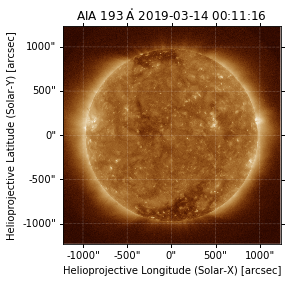

In [4]:
import sunpy.map

aia_map = sunpy.map.Map(files_downloaded[0])
aia_map.plot()

## Coordinates

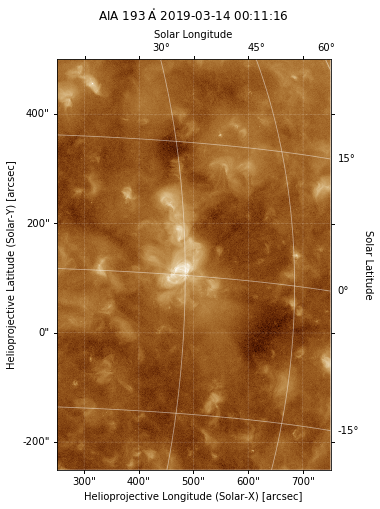

In [5]:
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord

top_right = SkyCoord(750 * u.arcsec, 500 * u.arcsec, frame=aia_map.coordinate_frame)
bottom_left = SkyCoord(250 * u.arcsec, -250 * u.arcsec, frame=aia_map.coordinate_frame)
aia_submap = aia_map.submap(bottom_left, top_right)

fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection=aia_submap)
aia_submap.plot()
aia_submap.draw_limb()
aia_submap.draw_grid()
fig.tight_layout()
plt.show()

## More coordinates

INFO: Obtained JPL HORIZONS location for Solar Dynamics Observatory (spac [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Venus Barycenter (2) [sunpy.coordinates.ephemeris]


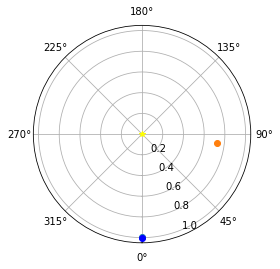

In [6]:
from sunpy.coordinates import get_horizons_coord

sdo_pos = get_horizons_coord('SDO', aia_map.date)
venus_pos = get_horizons_coord('Venus barycenter', aia_map.date)

helio_plot(sdo_pos, venus_pos)

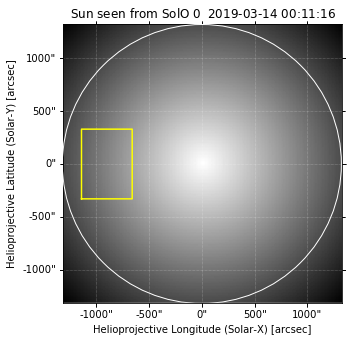

In [7]:
from sunpy.coordinates import frames

#Create an observer looking to the (-900,0) of the sun
spice_pointing = {'x': -900 * u.arcsec, 
                  'y': 0 * u.arcsec}
spice_FOV = {'width': 8 * u.arcmin, 
             'height': 11 * u.arcmin} # (480 slits)
spice_corners = get_corners(spice_pointing, spice_FOV)

spice_obs = SkyCoord(spice_corners,
                     observer=venus_pos,
                     frame=frames.Helioprojective)

solo_test_map = sun_seen_from(venus_pos, name='SolO')

# Displaying where we are pointing
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection=solo_test_map)
solo_test_map.plot()
solo_test_map.draw_limb()
ax.plot_coord(spice_obs, c='yellow')
plt.show()

Let's display where's these coordinates are on AIA

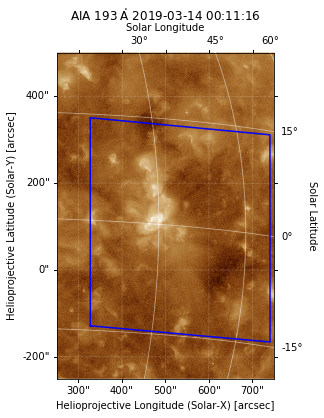

In [8]:
# Transform the coordinates from "SPICE" to AIA

spice_aia_view = spice_obs.transform_to(aia_map.coordinate_frame)

# And display
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection=aia_submap)
aia_submap.plot()
aia_submap.draw_grid()
ax.plot_coord(spice_aia_view, c='blue')
plt.show()

<center>
    <img src="media/heliopy.png">
</center>

https://heliopy.org

- Openly developed python package for in-situ data analysis
- Two main components:
    - Data download/import
    - Spacecraft trajectory analysis

``heliopy.data``
---
- Automatically downloading/importing data
- Currently supports:
    - ACE, ARTEMIS/THEMIS, Cassini, Cluster, DSCOVR, Helios, IMP, MESSENGER, MMS, OMNI, Ulysses, WIND
- Future support for:
    - Parker Solar Probe, Solar Orbiter

``heliopy.data`` example
---

In [9]:
from heliopy.data import helios
from datetime import datetime

starttime = datetime(1976, 4, 7)
endtime = datetime(1976, 4, 20)
probe = '2'

data = helios.corefit(probe, starttime, endtime)

print(data.columns)

['B instrument', 'Bx', 'By', 'Bz', 'sigma B', 'Ion instrument', 'Status', 'Tp_par', 'Tp_perp', 'carrot', 'r_sun', 'clat', 'clong', 'earth_he_angle', 'n_p', 'vp_x', 'vp_y', 'vp_z', 'vth_p_par', 'vth_p_perp']


Plotting data
---

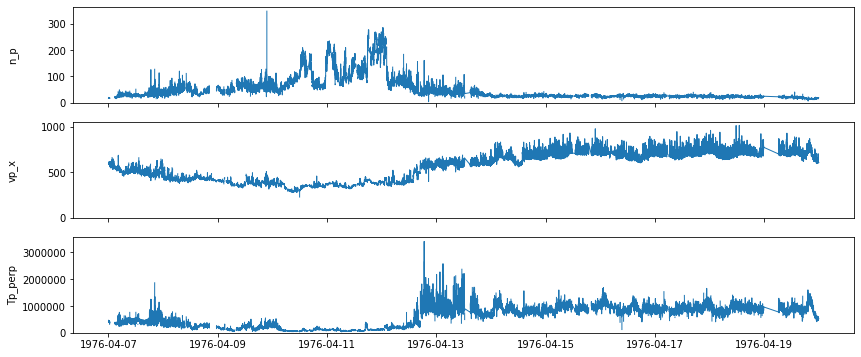

In [10]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(14, 6))
for ax, var in zip(axs, ['n_p', 'vp_x', 'Tp_perp']):
    ax.plot(data.index, data.quantity(var), lw=1)
    ax.set_ylabel(var)
    ax.set_ylim(bottom=0)
fig.align_ylabels()

``heliopy.spice``
---
- Working with SPICE kernels
- Built-in support for:
    - Helios, Juno, **PSP**, **Solar Orbiter**, STEREO, Ulysses
- Can work with custom SPICE kernels

``heliopy.spice`` example
---

In [11]:
from heliopy import spice
import heliopy.data.spice as spicedata

# Download and load Solar Orbiter predicted SPICE kernel
spice.furnish(spicedata.get_kernel('solo_2020'))
solo = spice.Trajectory('Solar Orbiter')

In [12]:
# Specify times at which to sample the trajectory
from datetime import datetime, timedelta
starttime = datetime(2020, 2, 20)
times = [starttime + timedelta(days=i) for i in range(365)]

# Generate the trajectory
solo.generate_positions(times, 'Sun', 'ECLIPJ2000')

# Print first 3 positions
print('Positions:', solo.x[:3], solo.y[:3], solo.z[:3], sep='\n')

Positions:
[-1.25784441e+08 -1.26850957e+08 -1.27878734e+08] km
[78155963.85469837 76303653.90518707 74428042.1756    ] km
[ 895595.67536024  963495.00362951 1031100.09167531] km


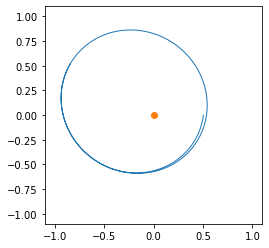

In [13]:
solo.generate_positions(times, 'Sun', 'ECLIPJ2000')
fig, ax = plot_orbit(solo)

Sun - spacecraft connection in Python
---
Using

- *SunPy* for EUV and mangetic field data
- *HelioPy* spacecraft trajectory
- *pfsspy* for PFSS extrapolation

Import and loading SPICE kernels
---

In [18]:
from heliopy import spice
from heliopy.data import spice as spicedata

spice.furnish(spicedata.get_kernel('psp'))
spice.furnish(spicedata.get_kernel('psp_pred'))

In [2]:
import astropy.coordinates as coord
from sunpy.coordinates import frames
def trajectory2skycoord(trajectory):
    skycoord = coord.SkyCoord(x=psp.x, y=psp.y, z=psp.z,
                          frame=frames.HeliographicCarrington,
                          representation_type='cartesian')
    skycoord.representation_type = 'spherical'
    return skycoord

Generate PSP trajectory
---

In [1]:
import astropy.units as u
from datetime import datetime, timedelta

psp = spice.Trajectory('SPP')
starttime = datetime(2018, 10, 31)
times = [starttime + timedelta(days=i) for i in range(18)]

# Use a non-inertial (Carrington) frame fixed with respect to the surface of the Sun
frame = 'IAU_SUN' 
psp.generate_positions(times, 'Sun', 'IAU_SUN')

# Take the PSP trajectory and put it into a coordinate system object
psp_sky_coord = trajectory2skycoord(psp)

NameError: name 'spice' is not defined

Plot PSP trajectory
---

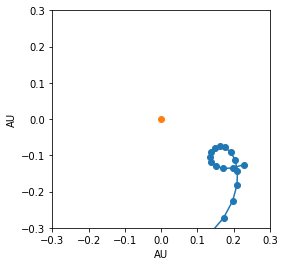

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_aspect('equal')

ax.plot(psp.x.to(u.au), psp.y.to(u.au), marker='o')
ax.plot(0, 0, marker='o', color='C1')

ax.set_xlim(-0.3, 0.3); ax.set_xlabel('AU');
ax.set_ylim(-0.3, 0.3); ax.set_ylabel('AU');

Trace longitude back along the Parker spiral
---

In [ ]:
import astropy.constants as const

omega_sun = 14.713 * u.deg / u.d
vsw = 300 * u.km / u.s
def delta_long(r):
    return omega_sun * (r - 2.5 * const.R_sun) / vsw

dlong = delta_long(psp_sky_coord.radius)
psp_solar_lon = psp_sky_coord.lon + dlong
psp_sky_coord = coord.SkyCoord(radius=psp_sky_coord.radius, lat=psp_sky_coord.lat,
                               lon=psp_solar_lon,
                               frame=frames.HeliographicCarrington,
                               representation_type='spherical')

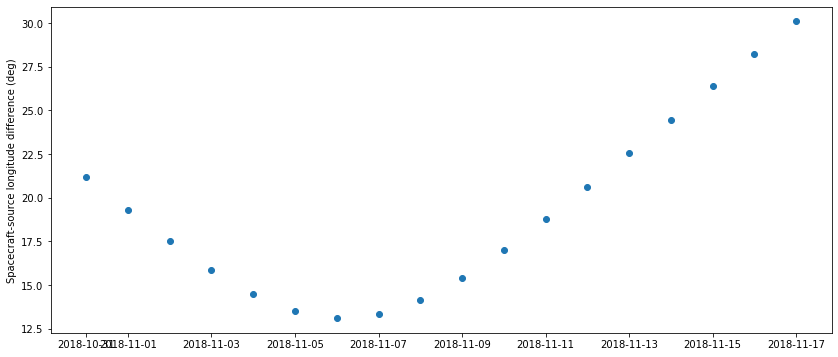

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot_date(psp.times, dlong.to(u.deg), marker='o')
ax.set_ylabel('Spacecraft-source longitude difference (deg)');

Import AIA map
----

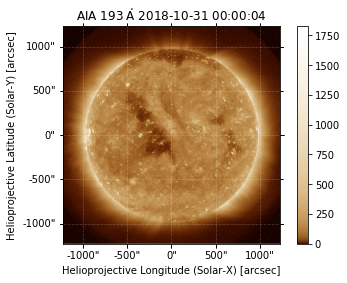

In [6]:
import sunpy.map
aia = sunpy.map.Map('AIA20181031_0000_0193.fits')
aia.peek()

Import GONG magnetic field map
---

In [7]:
import sunpy.io
# Use SunPy to read the .fits file with the data
[[data, header]] = sunpy.io.read_file('mrzqs181030t0014c2210_259.fits')
header['cunit1'] = 'arcsec'
header['cunit2'] = 'arcsec'
gong_map = sunpy.map.Map(data, header)

# Extract the data, and remove the mean to enforce div(B) = 0 on the solar
# surface
br = data
br = br - np.nanmean(br)
offset = 5
# GONG maps have their LH edge at -180deg, so roll to get it at 0deg
br = np.roll(br, header['CRVAL1'] + 180 + offset, axis=1)

Set up PFSS input
---

Text(0.5, 1.0, 'Input GONG map')

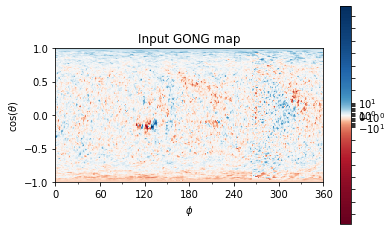

In [8]:
import pfsspy
nr = 60    # Number of radial model points
rss = 2.5  # Source surface radius

# Create PFSS input object
input = pfsspy.Input(br, nr, rss, dtime=aia.date)

# Plot input magnetic field
import matplotlib.colors as mcolor
fig, ax = plt.subplots()
mesh = input.plot_input(ax, norm=mcolor.SymLogNorm(5))
fig.colorbar(mesh)
ax.set_title('Input GONG map')

Calculate PFSS solution
---

In [9]:
output = pfsspy.pfss(input)

# Trace field lines through the solution
flines = []
psp_sky_coord.representation_type = 'cartesian'
for i in range(len(psp.x)):
    psp_coord = np.array([psp_sky_coord.x[i].value,
                          psp_sky_coord.y[i].value,
                          psp_sky_coord.z[i].value])
    psp_coord = psp_coord * 2.49 / np.linalg.norm(psp_coord)
    fline = output.trace(psp_coord,  atol=1e-8, rtol=1e-8)
    flines.append(fline)

Plot PFSS solution
---

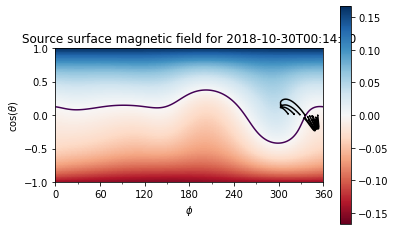

In [10]:
fig, ax = plt.subplots()
mesh = output.plot_source_surface(ax)
fig.colorbar(mesh)
ax.set_title('Source surface magnetic field for {}'.format(header['DATE']))
output.plot_pil(ax)
for fline in flines:
    fline.representation_type = 'spherical'
    ax.plot(fline.lon, np.sin(fline.lat), color='k')

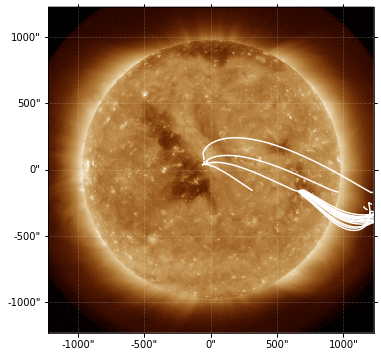

In [11]:
# Create a figure and plot AIA image
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(1, 1, 1, projection=aia)
aia.plot(annotate=False, axes=ax, vmin=0)

# Plot field lines
for fline in flines:
    fline = fline.transform_to(aia.coordinate_frame)
    ax.plot(fline.Tx.to(u.deg), fline.Ty.to(u.deg),
            transform=ax.get_transform('world'),
            alpha=1, color='white')

ax.set_xlim(0, 1024);

<center><h1>SolO Python</h1></center>

<br>
<center>
    <font size="56px"><b>How</b></font>
<table>
    <col width="230" align="left">
    <col width="130" align="center">
    <col width="230" align="right">
    <tr>
      <td style="vertical-align:bottom;"><img style="height: 70px;" src="media/sunpy_transparent.png"></td>
      <td style='text-align:center;'><font size="56px"><b>  and  </b></font></td>
      <td style='text-align:right;'><img style="height: 70px;" src="media/heliopy.png"></td>
    </tr>
</table>
<font size="56px"><b>can help your data analysis</b></font>
    </center>
    
    
<br>

<center>
    
#### David Pérez-Suárez & David Stansby

</center>